In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

pd.options.display.min_rows = 20

df = pd.read_csv('Titanic-train.csv')
len(df.columns)
column_names = df.columns[[1,2,4,5,6,7,9,11]]
column_names
df.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
760,761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5000,NaN,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
447,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.5500,NaN,S


<h4>Sprawdzamy ilość unikalnych elementów w poszczególnych kolumnach (atrybutach) oraz typ danych przechowywany w tej kolumnie.<br>
Czy mamy do czynienia ze zmiennymi kategorycznymi (jakościowymi), czy też numerycznymi (ilościowymi)</h4>

In [3]:
for col_name in df.columns:
    print(f'{col_name:12}- unikalne elementy: {len(df[col_name].unique()):^4}- typ[{df[col_name].dtype}]')

PassengerId - unikalne elementy: 891 - typ[int64]
Survived    - unikalne elementy:  2  - typ[int64]
Pclass      - unikalne elementy:  3  - typ[int64]
Name        - unikalne elementy: 891 - typ[object]
Sex         - unikalne elementy:  2  - typ[object]
Age         - unikalne elementy:  89 - typ[float64]
SibSp       - unikalne elementy:  7  - typ[int64]
Parch       - unikalne elementy:  7  - typ[int64]
Ticket      - unikalne elementy: 681 - typ[object]
Fare        - unikalne elementy: 248 - typ[float64]
Cabin       - unikalne elementy: 148 - typ[object]
Embarked    - unikalne elementy:  4  - typ[object]


In [4]:
def check_if_outlier(DF : pd.DataFrame, feature : str = '', degree = 2):
        """Funkcja zwracająca Prawdę lub Fausz w zależności czy element jest odstający.
        dane wejściowe - pd.DataFrame z wartościami numerycznymi. 
        dane wyjściowe pd.Series zwracający True i False."""
        std_dev = DF[feature].std()
        miu = DF[feature].mean()
        ret_val = []
        for elt in DF[feature]:
            if elt > miu + degree * std_dev or elt < miu - degree * std_dev:
                ret_val.append(True)
            else: 
                ret_val.append(False)
        return pd.Series(ret_val)

def opisz_dane (df: pd.DataFrame) -> pd.DataFrame:
    wiersze = ('wszystkie elementy','unikalne elementy', 'braki (NA/nan)', 'max', 'min', 'średnia arytmetyczna', 'mediana', 'moda',
    'ochylenie standardowe', 'ilosc elementów odstających')

    is_numeric = {column_name: True if ('int' in str(df[column_name].dtype)  or df[column_name].dtype =='float') else False for column_name in df.columns}
    all_items = {column_name : df[column_name].count() for column_name in df.columns}
    unique_items = {column_name : df[column_name].value_counts().count() for column_name in df.columns}
    brak_w_items = {column_name : sum(df[column_name].isna()) for column_name in df.columns}
    max_items = {column_name: df[column_name].max() if is_numeric[column_name] else pd.NA for column_name in df.columns}
    min_items = {column_name: df[column_name].min() if is_numeric[column_name] else pd.NA for column_name in df.columns}
    average_items = {column_name: df[column_name].mean() if is_numeric[column_name] else pd.NA for column_name in df.columns}
    median_items = {column_name: df[column_name].median() if is_numeric[column_name] else pd.NA for column_name in df.columns}
    mode_items = {column_name: df[column_name].mode() if is_numeric[column_name] else Counter(df[column_name]).most_common() \
    if len(Counter(df[column_name]).most_common()) < 3 else pd.NA for column_name in df.columns}
    std_deviation = {column_name: df[column_name].std() if is_numeric[column_name] else pd.NA for column_name in df.columns}

    outliers = {column_name: check_if_outlier(df, column_name).sum() if is_numeric[column_name] else pd.NA for column_name in df.columns}

    serie= [all_items, unique_items, brak_w_items, max_items, 
    min_items, average_items,median_items,mode_items,std_deviation,outliers]

#    print(pd.DataFrame(serie, index = wiersze))
    return pd.DataFrame(serie, index = wiersze)

In [5]:
df = df.astype({'Survived' : 'category', 'Pclass' : 'category', 'Parch' : 'category', 'SibSp': 'category', 'Embarked' : 'category'})
opisz_dane(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
wszystkie elementy,891,891,891,891,891,714,891,891,891,891,204,889
unikalne elementy,891,2,3,891,2,88,7,7,681,248,147,3
braki (NA/nan),0,0,0,0,0,177,0,0,0,0,687,2
max,891,<NA>,<NA>,<NA>,<NA>,80.0,<NA>,<NA>,<NA>,512.3292,<NA>,<NA>
min,1,<NA>,<NA>,<NA>,<NA>,0.42,<NA>,<NA>,<NA>,0.0,<NA>,<NA>
średnia arytmetyczna,446.0,<NA>,<NA>,<NA>,<NA>,29.699118,<NA>,<NA>,<NA>,32.204208,<NA>,<NA>
mediana,446.0,<NA>,<NA>,<NA>,<NA>,28.0,<NA>,<NA>,<NA>,14.4542,<NA>,<NA>
moda,0 1 1 2 2 3 3 4 4 ...,"[(0, 549), (1, 342)]",<NA>,<NA>,"[(male, 577), (female, 314)]",0 24.0 dtype: float64,<NA>,<NA>,<NA>,0 8.05 dtype: float64,<NA>,<NA>
ochylenie standardowe,257.353842,<NA>,<NA>,<NA>,<NA>,14.526497,<NA>,<NA>,<NA>,49.693429,<NA>,<NA>
ilosc elementów odstających,0,<NA>,<NA>,<NA>,<NA>,29,<NA>,<NA>,<NA>,38,<NA>,<NA>


In [6]:
def czy_numeryczna(s: pd.Series):
    ret_val = False
    if 'int' in str(s.dtype) or s.dtype == 'float':
        ret_val = True
    return ret_val

def jaki_plot(r: pd.Series, c: pd.Series):
    match czy_numeryczna(r), czy_numeryczna(c):
        case True, True:
            return 'scatter'
        case False, False:
            return 'hitmapa'
        case False, True:
            return 'h_bar'
        case True, False:
            return 'box_plot'


def ladny_plot(DF: pd.DataFrame, mainish = None):
    col_names = DF.columns
    print(col_names)

    fig, ax = plt.subplots(nrows = DF.shape[1],ncols = DF.shape[1],figsize=(len(col_names)*5, len(col_names)*5), tight_layout = True)

    for row_id, row_name in enumerate(col_names):
        for col_id, col_name in enumerate(col_names):
            #print(f'{row_id:^3} {row_name:^10} - {col_id:^3} {col_name:^10} {czy_numeryczna(DF[row_name]):^7} {czy_numeryczna(DF[col_name]):^7} {jaki_plot(DF[row_name],DF[col_name])}')
            
            if row_id == col_id:
                sns.histplot(data = DF[row_name], ax = ax[row_id, col_id]).set(xlabel=None, ylabel = None)
                ax[row_id, col_id].set_title(row_name)
                continue
            if (czy_numeryczna(DF[row_name]), czy_numeryczna(DF[col_name])) == (True, True):
                sns.scatterplot(x = DF[col_name], y = DF[row_name], ax=ax[row_id, col_id], size = 1, hue = mainish, alpha= 0.4).set(xlabel=None,ylabel = None)
            elif (czy_numeryczna(DF[row_name]), czy_numeryczna(DF[col_name])) == (True, False):
                sns.boxplot(x = DF[col_name], y = DF[row_name], ax=ax[row_id, col_id], hue  = mainish).set(xlabel=None,ylabel = None)
            elif (czy_numeryczna(DF[row_name]), czy_numeryczna(DF[col_name])) == (False, True):
                sns.stripplot(x = DF[col_name], y = DF[row_name], jitter=0.4, ax=ax[row_id, col_id], hue = mainish, alpha= 0.4).set(xlabel=None,ylabel = None)
            elif (czy_numeryczna(DF[row_name]), czy_numeryczna(DF[col_name])) == (False, False):
                sns.heatmap(data= DF.groupby([row_name, col_name]).size().unstack(), ax=ax[row_id, col_id],fmt = '.0f',  cbar = False, annot = True, cmap = "viridis").set(xlabel=None,ylabel = None)
                                       #groupby(['Pclass', 'Survived']).size().unstack())
                #print(DF[[row_name,col_name]].groupby(col_name).count())
       
        for a, c in zip(ax[0], col_names):
            a.set_title(c)
        for a, c in zip(ax[:,0], col_names):
            a.set_ylabel(c)
    
    fig.tight_layout()
    plt.show()
#ladny_plot(df[column_names], df['Survived'])


Index(['Survived', 'Age', 'Sex', 'Pclass', 'Fare', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')


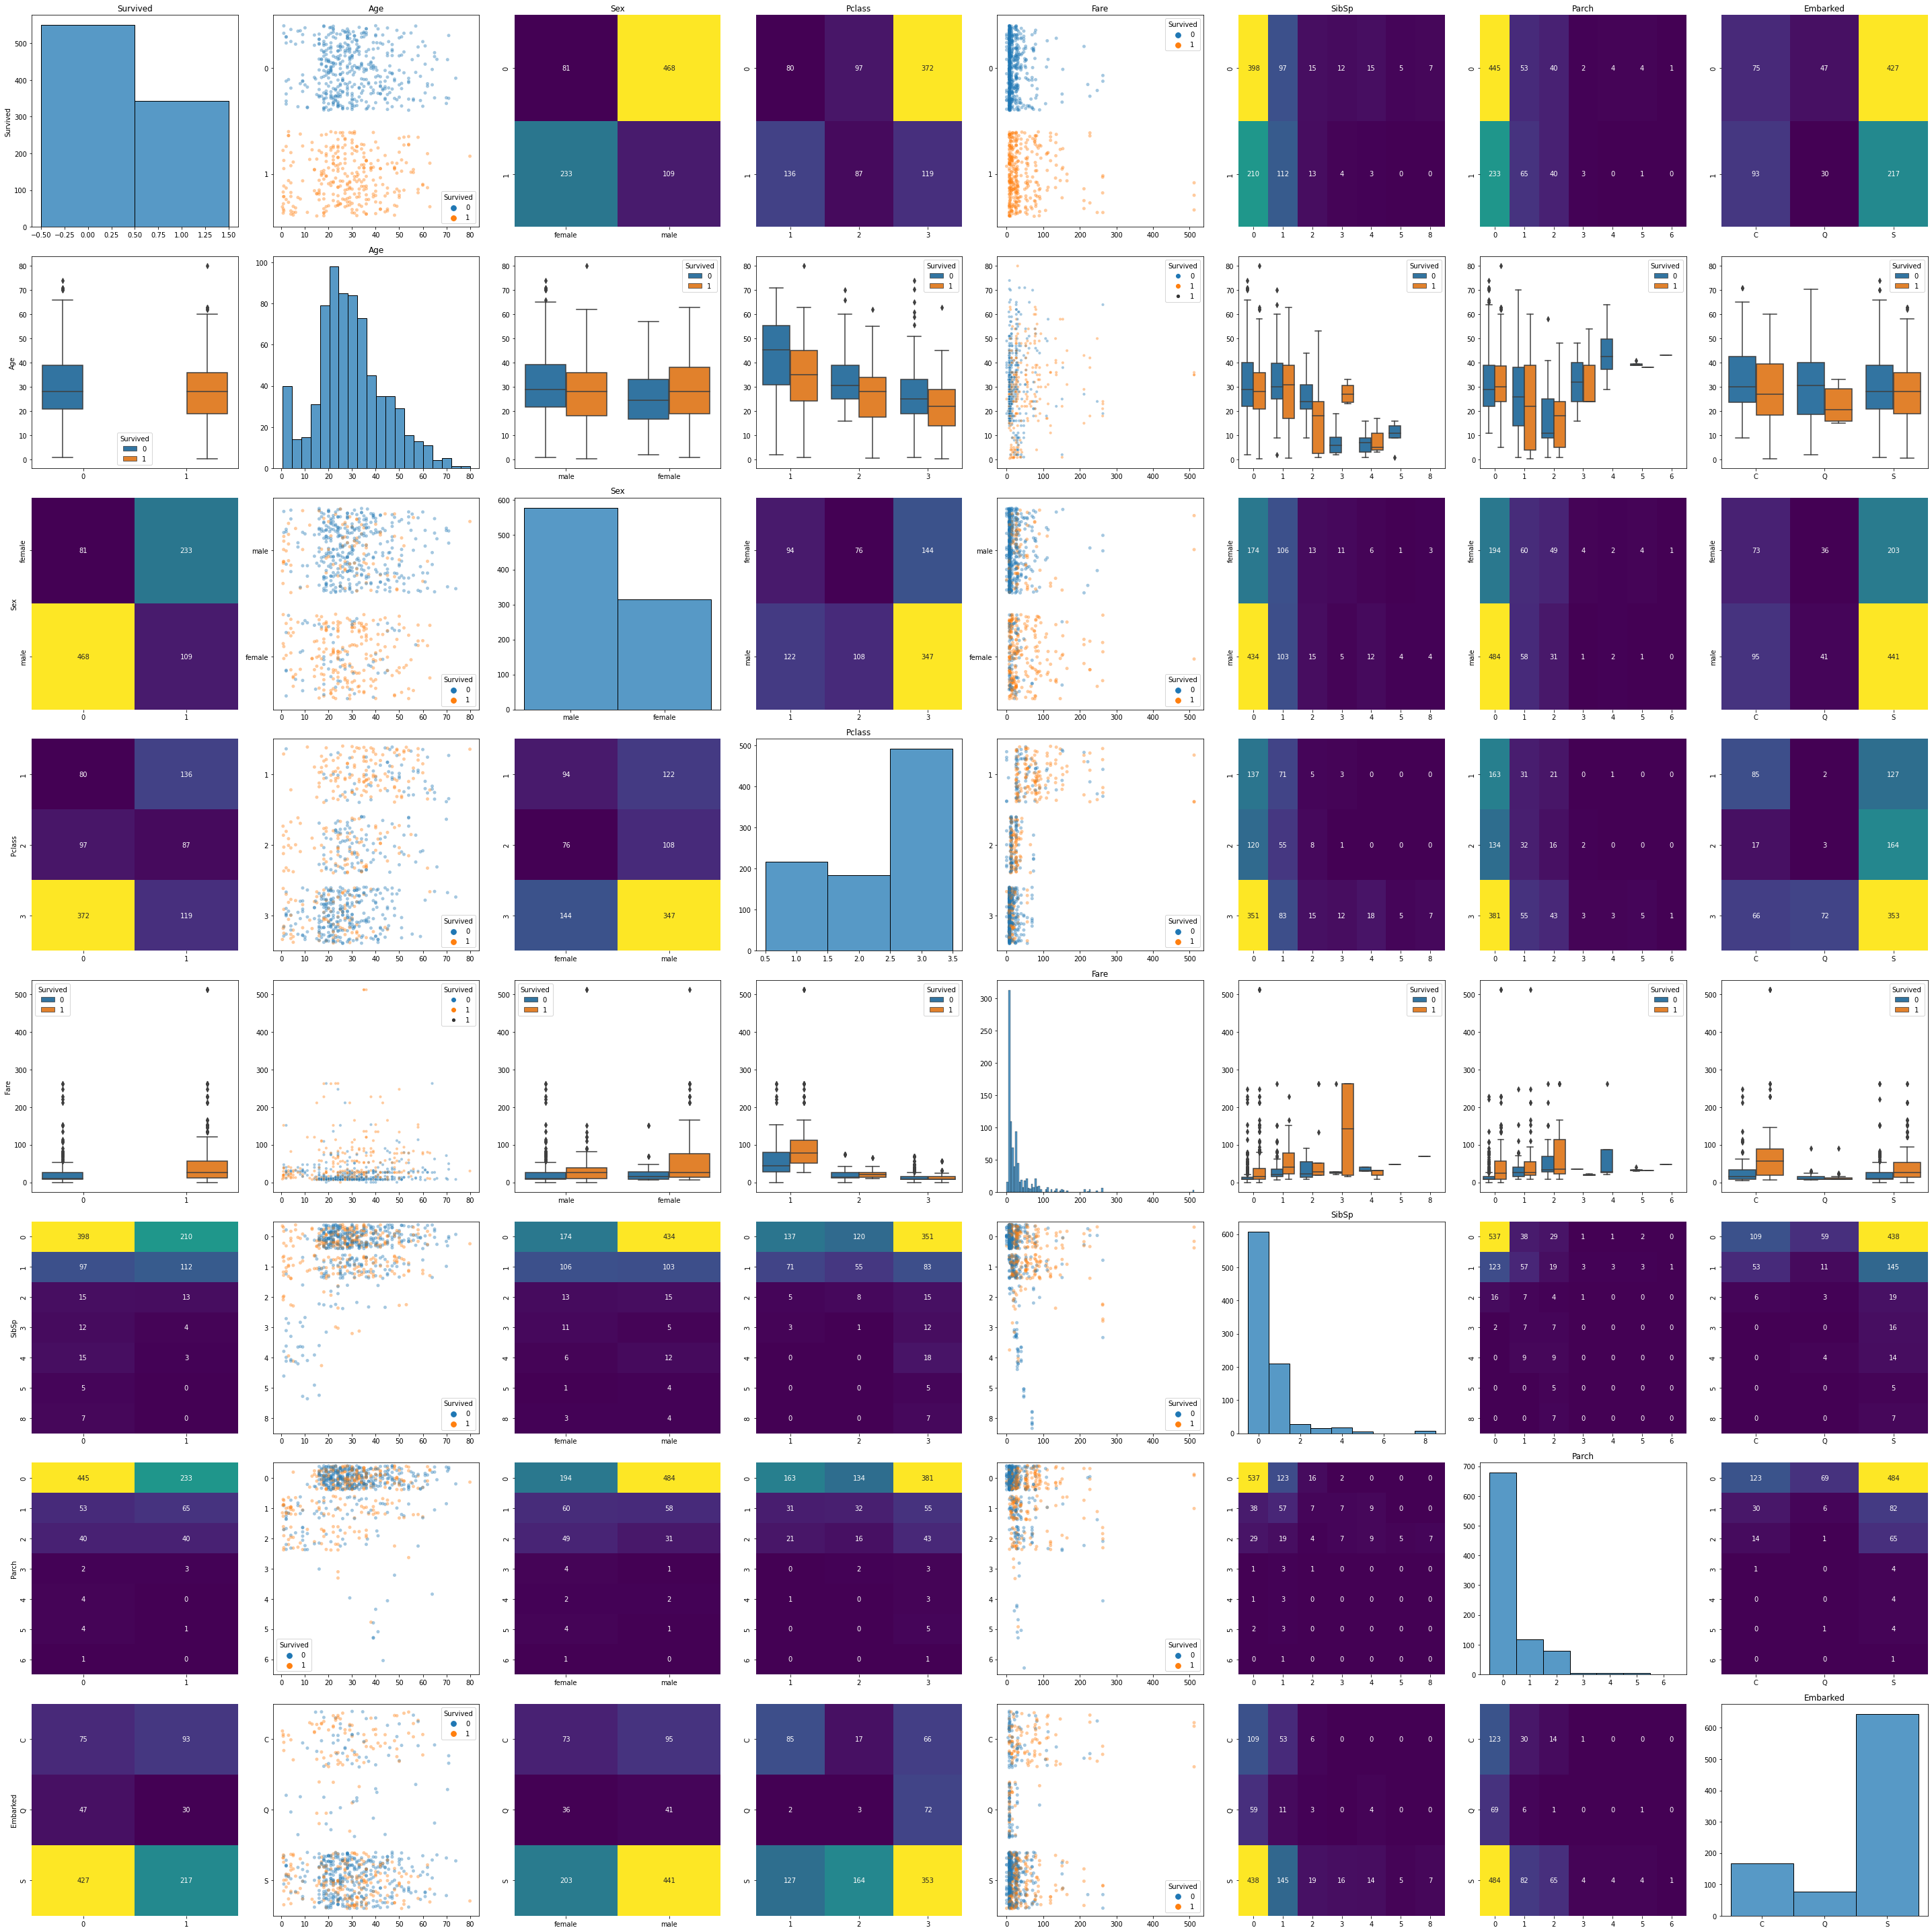

In [7]:
#ladny_plot(df[['Survived', 'Age', 'Sex']], df['Survived'])

dejta = df[['Survived', 'Age', 'Sex', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Embarked']]
dejta.columns

ladny_plot(dejta, dejta['Survived'])

In [8]:
import re

#print(re.search(r'\.', 'Dupa, pana. (ha . . . ha) Romana').span()[1])
#re.search(r',.+\.', 'Dupa, pana. (ha . . . ha) Romana', flags = 0)[0][2:re.match(r'.', 'Dupa, pana. (ha . . . ha) Romana')[0]]

df['Title']=df['Name'].apply(lambda x :x[x.index(',')+2: x.index('.')])
titele = [x[0] for x in Counter(df['Title']).most_common(4)]
print(titele)
df['Title'] = df['Title'].apply(lambda x : x if x in titele else 'Other')

df.sample(15)


#for i, j in Counter(df.Title).items():
#    print(f'{i:<15}  {j}')

['Mr', 'Miss', 'Mrs', 'Master']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,Mr
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S,Mr
465,466,0,3,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S,Mr
420,421,0,3,"Gheorgheff, Mr. Stanio",male,NaN,0,0,349254,7.8958,NaN,C,Mr
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S,Miss
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S,Mr
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S,Mr
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,Master
67,68,0,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,NaN,S,Mr
238,239,0,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5000,NaN,S,Mr


Index(['Survived', 'Age', 'Sex', 'Pclass', 'Fare', 'SibSp', 'Parch',
       'Embarked', 'Title'],
      dtype='object')


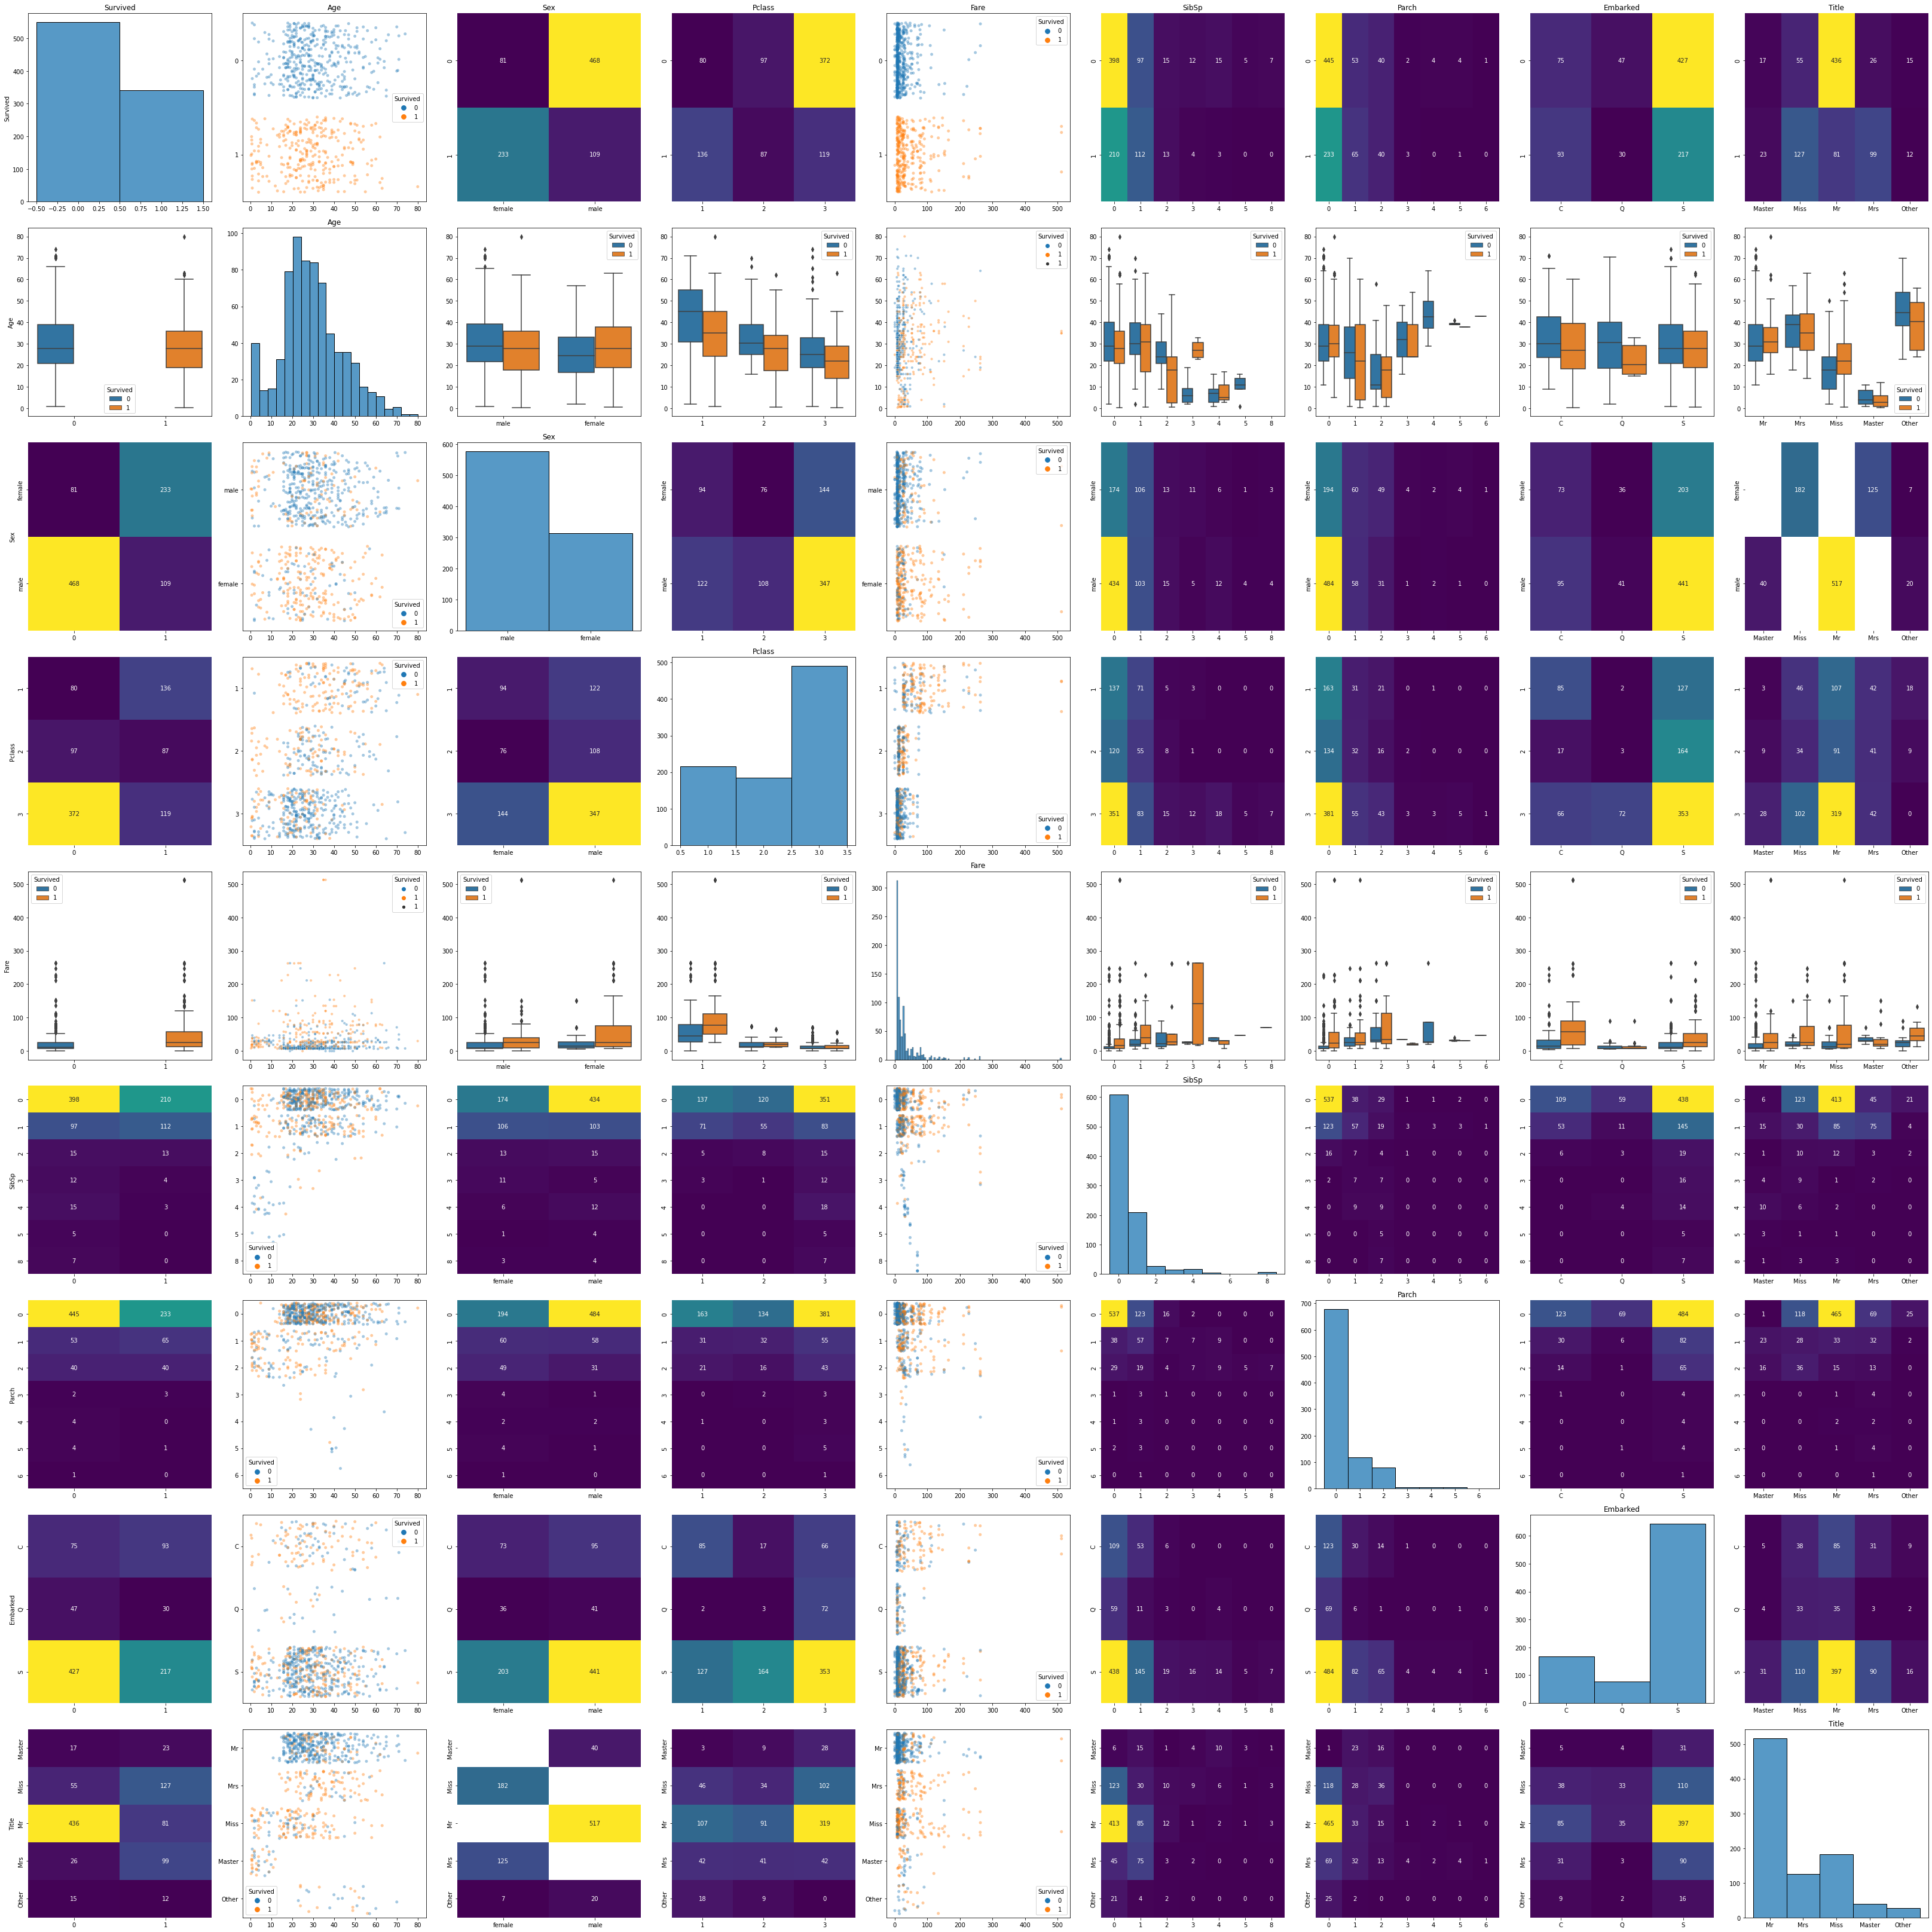

In [9]:
#ladny_plot(df[['Survived', 'Age', 'Sex']], df['Survived'])

dejta = df[['Survived', 'Age', 'Sex', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Embarked', 'Title']]
dejta.columns

ladny_plot(dejta, dejta['Survived'])

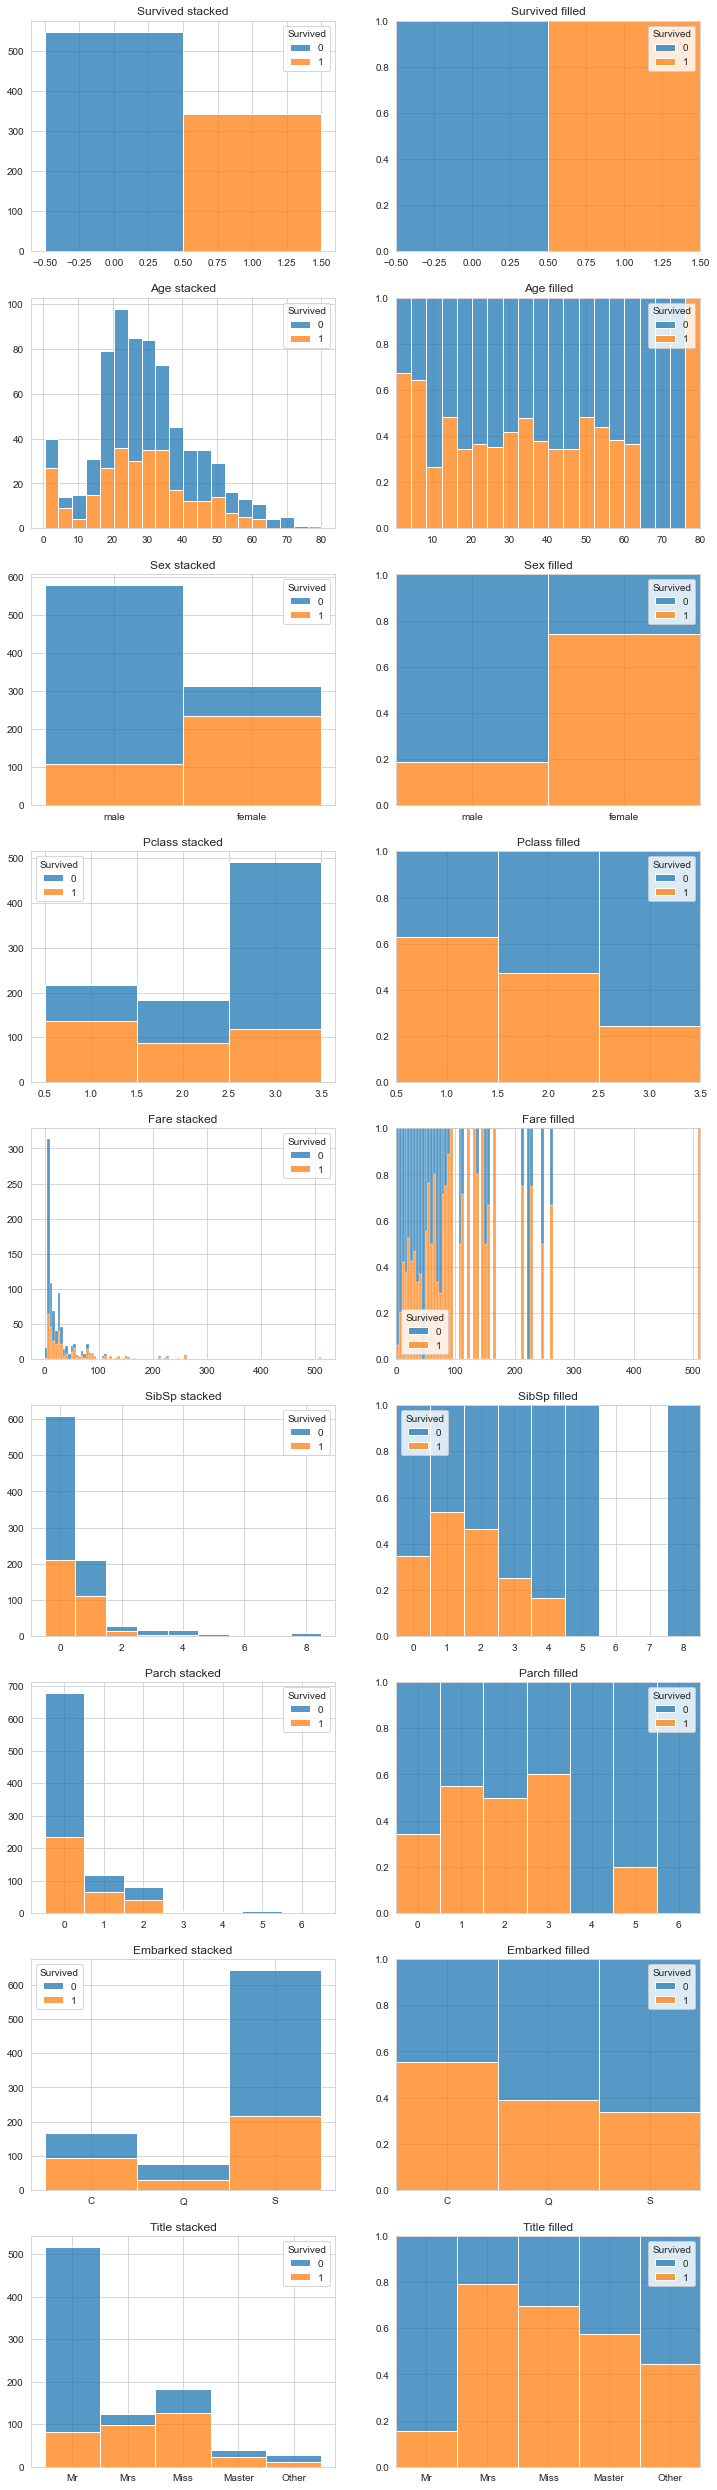

In [32]:

sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=len(dejta.columns), ncols= 2, figsize = (12,5*len(dejta.columns)))
for col_id, col in enumerate(dejta):
    sns.histplot(x = dejta[col], ax = ax[col_id,0], hue=dejta['Survived'], multiple='stack').set(xlabel=None, ylabel = None)
    plt.grid(axis = 'both')
    sns.histplot(x = dejta[col], ax = ax[col_id,1], hue=dejta['Survived'], multiple='fill').set(xlabel=None, ylabel = None)
    plt.grid(axis = 'both')
    ax[col_id,0].set_title(f'{col} stacked')
    ax[col_id,1].set_title(f'{col} filled')
